# Practice of Regression
* The tutorial website I refered to: 
- http://to52016.pixnet.net/blog/post/343518241-%5Bpython%5D--機器學習%28scikit-learn%29---簡單回歸分析
- https://blog.csdn.net/u012162613/article/details/42192293


### Load The Data
* The code in this part was extracted from the file of "Practice of Support Vector Machine."

In [65]:
from sklearn import datasets
import pandas as pd

boston = datasets.load_boston()
print(boston['feature_names'])


# Extract all the elements in 'data' type and create a dataframe with module "pandas".
dataOfFW = pd.DataFrame(boston['data'], columns = boston['feature_names'])
print(dataOfFW.head(10))    # Show top 10 rows of dataOfFW.


# Extract all the elements in 'target' type and create a dataframe with module "pandas".
resultOfFW = pd.DataFrame(boston['target'], columns = ['Prediction of Price'])
print(resultOfFW.head(10))    # Show top 10 rows of resultOfFW.

# Combine the data form and result form
newDF = pd.concat([dataOfFW, resultOfFW], axis = 1)
newDF.head(10)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  39

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prediction of Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Generate the Training Sample Set

In [66]:
from sklearn.model_selection import train_test_split

# We use this function to create train set and test set randomly.
X_train,X_test, y_train, y_test = train_test_split(newDF[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',	'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']], newDF[['Prediction of Price']], test_size = 0.3, random_state = 0)    

### Standardize The Data of Sample Set

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# I need to instantiate StandardScaler first, or I would get some errors.

sc.fit(X_train)                        # Initialize the action of standardizing the feature set of sample.
X_train_nor = sc.transform(X_train)    # Get the standardized value of train sample set.
X_test_nor = sc.transform(X_test)      # Get the standardized value of test sample set.

### Generate The Multiple Linear Regression Model

In [68]:
from sklearn import linear_model
from sklearn.feature_selection import f_regression

# Declare & Initialize the action of linear regression.
regression = linear_model.LinearRegression()

# Train the Model
regression.fit(X_train_nor, y_train)   

# Examine The Performance of Linear Regression Model
r_squared = regression.score(X_train_nor, y_train)
adj_r_squared = r_squared - (1 - r_squared) * (X_train.shape[1] / (X_train.shape[0] - X_train.shape[1] - 1))

print('Each coefficient in the above regression model:', regression.coef_)
print('The intercept in the above regression model:', regression.intercept_ )
print('The R-square of the above regression model:', r_squared)
print('The adjusted R-square of the above regression model:', adj_r_squared)
print('The p-value of each coefficient in the above regression model:', f_regression(X_train, y_train)[1])

Each coefficient in the above regression model: [[-0.99884541  1.04926169  0.08283818  0.61938203 -1.87828363  2.69828142
  -0.27592019 -3.09716434  2.09139628 -1.88530946 -2.26382523  0.59446503
  -3.45020002]]
The intercept in the above regression model: [22.74548023]
The R-square of the above regression model: 0.7644563391821222
The adjusted R-square of the above regression model: 0.7554502580332033
The p-value of each coefficient in the above regression model: [6.41158158e-14 4.95302857e-14 3.05628798e-24 2.17666529e-03
 4.28001007e-17 2.44958160e-55 2.24917643e-14 2.90986820e-06
 2.83596692e-14 6.28935737e-22 3.28375250e-31 4.03681568e-10
 1.99312376e-63]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* "anArray.shape" function could be used to check the position of an array, we could use ".shape(0)" to check the number of rows, and we could use ".shape(1)" to check the number of column.
* There's no any function to compute the adjusted r-square in the module "sklearn", so we need to calculate it manually.
* "f_regression()" function could be used to check p-value in order to examine the significance of each variables. (If p-value is below 0.05 under the 95% of level of confidence, it indicates that the variable is significant.)

### Prediction and Observation of Distribution of The Result

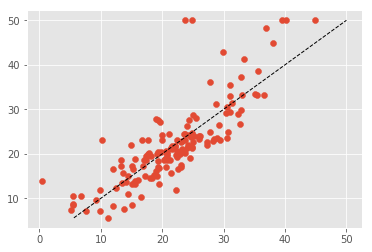

In [69]:
prediction = regression.predict(X_test_nor)    # Use the linear model to predict the price.

import matplotlib.pyplot as plot
plot.style.use('ggplot')  
plot.scatter(prediction, y_test)
plot.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)    # Draw the dash line
plot.show()

* If the scatters are closed to that dash line in the plot above, it indicates that the performance of our prediction is better.

### Generate The Ridge Linear Regression Model

* Ridge linear model was used to solve the problem of Multicollinearity, the difference between normal linear regression and ridge linear regression is the final regularizer.

Each coefficient in the above ridge regression model: [[-1.17729906e-01  4.54993163e-02 -9.58510635e-03  2.49661353e+00
  -1.09704320e+01  3.88166706e+00 -1.51932794e-02 -1.43149962e+00
   2.25343243e-01 -1.14262661e-02 -9.61308497e-01  7.25133363e-03
  -4.92443229e-01]]
The intercept in the above ridge regression model: [34.34519137]
The R-square of the above regression model: 0.7634862329498298


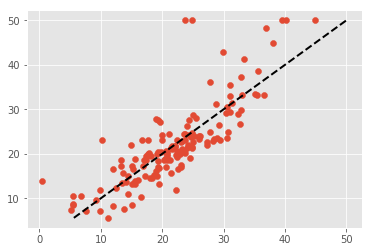

In [70]:
model_ridge=linear_model.Ridge(alpha = .5)    # Initialize the model
model_ridge.fit(X_train,y_train)    # Train the model
print('Each coefficient in the above ridge regression model:', model_ridge.coef_)
print('The intercept in the above ridge regression model:', model_ridge.intercept_)
print('The R-square of the above regression model:', model_ridge.score(X_train,y_train))

prediction = regression.predict(X_test_nor)    # Prediction

plot.scatter(prediction, y_test)
plot.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plot.show()

* It seems that there's no problem of Multicollinearity in this case.
* The tutorial website I refered to: https://blog.csdn.net/u013597931/article/details/79915804
* To get more information about variable selection, I could visit the website at: https://taweihuang.hpd.io/2016/09/12/讀者提問：多元迴歸分析的變數選擇/

### Generate The PCA and Decompose The Original Sample Set

In [71]:
from sklearn.decomposition import PCA

# Check which dimension is the best
for j in range(0, len(boston['feature_names'])):
    pcaModel = PCA(n_components = j)    # "n_components" means the number of dimension we need to keep.
    new_X_train_nor = pcaModel.fit_transform(X_train_nor)    # Decompose the model

    varianceRatio = pcaModel.explained_variance_ratio_    # ".explained_variance_ratio" could be used to examine the percentage of variance new model could covered.
    aggregateRatio = 0
    previousOne = 0
    
    for i in range(0, len(varianceRatio)):
          aggregateRatio += varianceRatio[i]
    
    print("If we select ", j, " variables, ", str(round(aggregateRatio * 100)), "% of the original variance was covered.") 
    
# I think that 90% is enough.
pcaGoodModel = PCA(n_components = 7)    # Initialize the model again
pacGoodModel_fit = pcaGoodModel.fit(X_train_nor)    # Train the PCA model
new_X_train_nor = pacGoodModel_fit.transform(X_train_nor)    # Use PCA model to decompose the sample set    

If we select  0  variables,  0 % of the original variance was covered.
If we select  1  variables,  46.0 % of the original variance was covered.
If we select  2  variables,  57.0 % of the original variance was covered.
If we select  3  variables,  67.0 % of the original variance was covered.
If we select  4  variables,  74.0 % of the original variance was covered.
If we select  5  variables,  81.0 % of the original variance was covered.
If we select  6  variables,  86.0 % of the original variance was covered.
If we select  7  variables,  90.0 % of the original variance was covered.
If we select  8  variables,  93.0 % of the original variance was covered.
If we select  9  variables,  95.0 % of the original variance was covered.
If we select  10  variables,  97.0 % of the original variance was covered.
If we select  11  variables,  98.0 % of the original variance was covered.
If we select  12  variables,  100.0 % of the original variance was covered.


### Generate The Multiple Linear Regression Model Again

In [72]:
regression.fit(new_X_train_nor, y_train)   

# Examine The Performance of Linear Regression Model
r_squared = regression.score(new_X_train_nor, y_train)
adj_r_squared = r_squared - (1 - r_squared) * (X_train.shape[1] / (X_train.shape[0] - X_train.shape[1] - 1))

print('Each coefficient in the above regression model:', regression.coef_)
print('The intercept in the above regression model:', regression.intercept_ )
print('The R-square of the above regression model:', r_squared)
print('The adjusted R-square of the above regression model:', adj_r_squared)
print('The p-value of each coefficient in the above regression model:', f_regression(X_train, y_train)[1])

Each coefficient in the above regression model: [[-2.37266325  2.70266357  3.47985379 -0.23317115 -1.5608932  -0.56799467
  -0.21134992]]
The intercept in the above regression model: [22.74548023]
The R-square of the above regression model: 0.7310611528589397
The adjusted R-square of the above regression model: 0.7207781969388404
The p-value of each coefficient in the above regression model: [6.41158158e-14 4.95302857e-14 3.05628798e-24 2.17666529e-03
 4.28001007e-17 2.44958160e-55 2.24917643e-14 2.90986820e-06
 2.83596692e-14 6.28935737e-22 3.28375250e-31 4.03681568e-10
 1.99312376e-63]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Generate The Logistic Regression Model
* This model is used to classify data instead of building a normal regression model.
* The tutorial website I refered to: https://medium.com/@yehjames/資料分析-機器學習-第3-3講-線性分類-邏輯斯回歸-logistic-regression-介紹-a1a5f47017e5 & https://ithelp.ithome.com.tw/articles/10187047

In [73]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

# Extract all the elements in 'data' type and create a dataframe with module "pandas".
dataOfFW = pd.DataFrame(iris['data'], columns = iris['feature_names'])
print(dataOfFW.head(10))    # Show top 10 rows of dataOfFW.

# Extract all the elements in 'target' type and create a dataframe with module "pandas".
resultOfFW = pd.DataFrame(iris['target'], columns = ['target result'])
print(resultOfFW.head(10))    # Show top 10 rows of resultOfFW.

# Combine the data form and result form
newDF = pd.concat([dataOfFW, resultOfFW], axis = 1)
newDF.head(10)



from sklearn.model_selection import train_test_split

# We use this function to create train set and test set randomly.
X_train,X_test, y_train, y_test = train_test_split(newDF[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], newDF[['target result']], test_size = 0.3, random_state = 0)    



from sklearn.preprocessing import StandardScaler

# Standardize the data
sc = StandardScaler()      # I need to instantiate StandardScaler first, or I would get some errors.

sc.fit(X_train)                        # Standardize the feature set of sample.
X_train_std = sc.transform(X_train)    # Get the standard deviation of train sample set.
X_test_std = sc.transform(X_test)      # # Get the standard deviation of test sample set.



# Building the logistic regression model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train_std, y_train['target result'])

predictionResult = logistic.predict(X_test_std)
actualResult = y_test['target result'].values

numberOfCorrectResult = 0
numberOfTotalResult = 0
for i in range(0, len(X_test_std) - 1):
    if predictionResult[i] == actualResult[i]:
        numberOfCorrectResult += 1
        numberOfTotalResult += 1
    else:
        numberOfTotalResult += 1

print("The accuracy of logistic model toward the data with four features is: " + str(round((numberOfCorrectResult / numberOfTotalResult) * 100, 2)) + "%.")
print("The r-square of this model is: " + str(logistic.score(X_train_std, y_train['target result'])) + ".")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1
   target result
0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8          